In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os

vacunados = pd.read_csv("D:/Github/05-Procesamiento-de-Señales/analisis-vacunas/data/dataset_total_vacunas.csv")
type(vacunados)
print(len(vacunados))
pd.set_option("display.max.columns", None)

vacunados["FECHA_ADMINISTRACION"] = pd.to_datetime(vacunados['FECHA_ADMINISTRACION'], format='%d%b%Y:%H:%M:%S')

vacunados = vacunados.sort_values(by=['FECHA_ADMINISTRACION'])

vacunados.tail()

9990


,FECHA_ADMINISTRACION,GRUPO_ETARIO,GENERO,VACUNA,TIPO_EFECTOR,DOSIS_1,DOSIS_2,ID_CARGA
9148,2021-07-08,31 a 40,M,AstraZeneca,Privado,4,6,NaN
9147,2021-07-08,31 a 40,F,Sputnik,Público nacional,1,19,NaN
9146,2021-07-08,31 a 40,F,Sputnik,Público,11424,2,NaN
9144,2021-07-08,31 a 40,F,AstraZeneca,Público,687,0,NaN
9110,2021-07-08,91 o mas,M,Sputnik,Privado,0,3,NaN


In [19]:
vacunados.describe()

,DOSIS_1,DOSIS_2,ID_CARGA
count,6387.000000,6387.000000,0.0
mean,110.974949,32.627055,NaN
std,499.657750,235.698575,NaN
min,0.000000,0.000000,NaN
25%,1.000000,0.000000,NaN
50%,9.000000,0.000000,NaN
75%,49.000000,7.000000,NaN
max,10905.000000,8004.000000,NaN


In [26]:
#vacunados.info()
vacunados["FECHA_ADMINISTRACION"].min()
vacunados["FECHA_ADMINISTRACION"].max()

Timestamp('2021-05-12 00:00:00')

In [6]:
import numpy as np
vacunados.describe(include=object)

,FECHA_ADMINISTRACION,GRUPO_ETARIO,GENERO,VACUNA,TIPO_EFECTOR
count,6387,6387,6387,6387,6387
unique,133,8,2,3,3
top,20APR2021:00:00:00,51 a 60,F,Sputnik,Público
freq,93,935,3267,3914,3211


In [8]:
vacunados.shape
vacunados.columns

Index(['FECHA_ADMINISTRACION', 'GRUPO_ETARIO', 'GENERO', 'VACUNA',
       'TIPO_EFECTOR', 'DOSIS_1', 'DOSIS_2', 'ID_CARGA'],
      dtype='object')

In [9]:
pd.unique(vacunados['GRUPO_ETARIO'])

array(['31 a 40', '41 a 50', '51 a 60', '61 a 70', '71 a 80', '81 a 90',
       '91 o mas', '30 o menos'], dtype=object)

In [10]:
pd.unique(vacunados['VACUNA'])

array(['AstraZeneca', 'Sputnik', 'Sinopharm'], dtype=object)

In [11]:
pd.unique(vacunados['TIPO_EFECTOR'])

array(['Privado', 'Público', 'Público nacional'], dtype=object)

In [12]:
pd.unique(vacunados['GENERO'])

array(['F', 'M'], dtype=object)

In [13]:
vacunados['DOSIS_1'].describe()

count     6387.000000
mean       110.974949
std        499.657750
min          0.000000
25%          1.000000
50%          9.000000
75%         49.000000
max      10905.000000
Name: DOSIS_1, dtype: float64

In [4]:
groupVacuna = vacunados.groupby('VACUNA')
groupVacuna.describe()

DOSIS_1                                                        \
              count        mean         std  min  25%  50%   75%      max   
VACUNA                                                                      
AstraZeneca  2784.0  221.556394  867.553960  0.0  1.0  8.0  48.0  12350.0   
Sinopharm    1958.0  130.540347  754.476579  0.0  0.0  2.0  27.0  12824.0   
Sputnik      5248.0  138.229040  650.408874  0.0  1.0  9.0  50.0  14144.0   

            DOSIS_2                                                      \
              count       mean         std  min  25%  50%   75%     max   
VACUNA                                                                    
AstraZeneca  2784.0  48.661279  363.523728  0.0  0.0  0.0   4.0  8292.0   
Sinopharm    1958.0  62.481614  409.772183  0.0  0.0  0.0   6.0  8005.0   
Sputnik      5248.0  30.889482  204.260520  0.0  0.0  1.0  15.0  9465.0   

            ID_CARGA                               
               count mean std min 25% 50% 75% max  
VACUNA                                             
AstraZeneca      0.0  NaN NaN NaN NaN NaN NaN NaN  
Sinopharm        0.0  NaN NaN NaN NaN NaN NaN NaN  
Sputnik          0.0  NaN NaN NaN NaN NaN NaN NaN

<AxesSubplot:xlabel='VACUNA'>

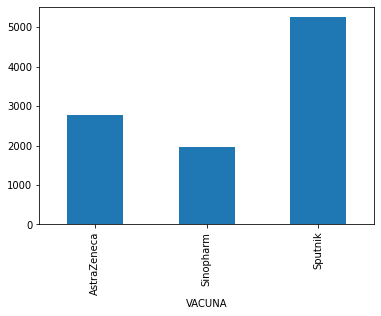

In [5]:
vacunasCount = groupVacuna["FECHA_ADMINISTRACION"].count()
vacunasCount.plot(kind="bar")

In [6]:
vacunasEdadesCount = vacunados.groupby("GRUPO_ETARIO")["FECHA_ADMINISTRACION"].count()
vacunasEdadesCount

GRUPO_ETARIO
30 o menos    1253
31 a 40       1351
41 a 50       1363
51 a 60       1418
61 a 70       1349
71 a 80       1269
81 a 90       1099
91 o mas       888
Name: FECHA_ADMINISTRACION, dtype: int64

<AxesSubplot:xlabel='GRUPO_ETARIO'>

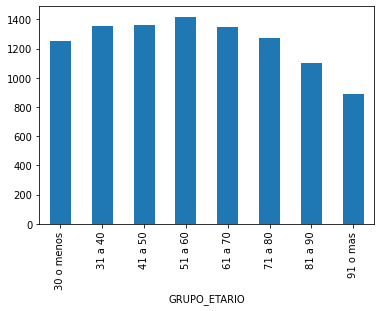

In [7]:
vacunasEdadesCount.plot(kind="bar")

In [19]:
groupGenero = vacunados.groupby('GENERO')
groupGenero.describe()

DOSIS_1                                                        DOSIS_2  \
         count        mean         std  min  25%   50%   75%      max   count   
GENERO                                                                          
F       3267.0  137.889807  569.382667  0.0  2.0  11.0  64.0  10905.0  3267.0   
M       3120.0   82.791987  412.471565  0.0  1.0   8.0  37.0   8714.0  3120.0   

                                                          ID_CARGA           \
             mean         std  min  25%  50%  75%     max    count mean std   
GENERO                                                                        
F       43.299969  290.899070  0.0  0.0  0.0  9.0  8004.0      0.0  NaN NaN   
M       21.451282  157.762209  0.0  0.0  0.0  6.0  5664.0      0.0  NaN NaN   

                            
       min 25% 50% 75% max  
GENERO                      
F      NaN NaN NaN NaN NaN  
M      NaN NaN NaN NaN NaN

In [29]:
d = {'hombres' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']), 'mujeres' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


<AxesSubplot:title={'center':'The title of my graph'}>

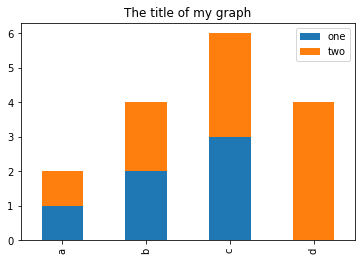

In [30]:
# Plot stacked data so columns 'one' and 'two' are stacked
my_df = pd.DataFrame(d)
my_df.plot(kind='bar', stacked=True, title="The title of my graph")

Text(0.5, 0, 'Edad')

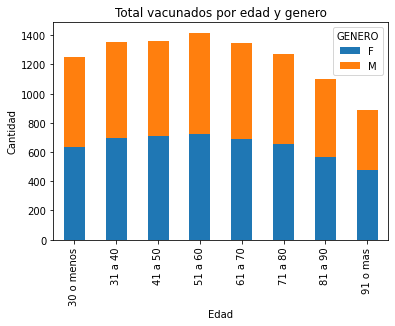

In [8]:
by_edad_sexo = vacunados.groupby(["GRUPO_ETARIO", "GENERO"])
edad_sexo_count = by_edad_sexo["FECHA_ADMINISTRACION"].count()
edadSexo_unstacked = edad_sexo_count.unstack()
s_plot = edadSexo_unstacked.plot(kind='bar', stacked=True, title="Total vacunados por edad y genero")
s_plot.set_ylabel("Cantidad")
s_plot.set_xlabel("Edad")

In [9]:
fechaCount = vacunados.sort_values(by=['FECHA_ADMINISTRACION']).groupby("FECHA_ADMINISTRACION")["VACUNA"].count()
nuevoDF = fechaCount.reset_index().rename(columns={'numero_de_caso': 'count'})
type(fechaCount)

pandas.core.series.Series

<ipython-input-10-caa694a2f82b>:1: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>
  fechaCount.plot(x='FECHA_ADMINISTRACION', kind="line").locator_params(axis="x", nbins=15)


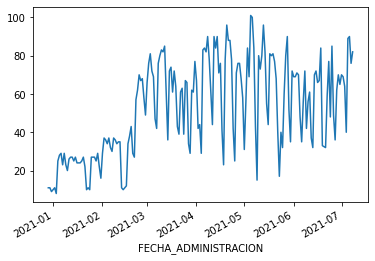

In [10]:
fechaCount.plot(x='FECHA_ADMINISTRACION', kind="line").locator_params(axis="x", nbins=15)

In [33]:
nuevoDF = fechaCount.reset_index().rename(columns={'VACUNA': 'count'})
type(fechaCount)
nuevoDF.head()

,FECHA_ADMINISTRACION,count
0,2020-12-29,10
1,2020-12-30,11
2,2020-12-31,9
3,2021-01-02,11
4,2021-01-03,8


<ipython-input-36-deb44c143092>:18: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>
  nuevoDF[['FECHA_ADMINISTRACION', 'media_movil']].plot(y='media_movil', x='FECHA_ADMINISTRACION', kind="line").locator_params(axis="x", nbins=15)


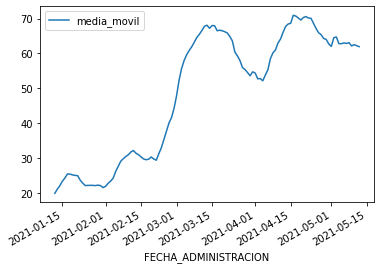

In [36]:
tamañoVentana = 14
# fechaCount["media_movil"] = fechaCount.rolling(tamañoVentana).mean()
# fechaCount["media_movil"]

# nuevoDF.describe()
# nuevoDF.head(200)
nuevoDF["media_movil"] = nuevoDF["count"].rolling(tamañoVentana).mean()
# nuevoDF["count"] = pd.to_numeric(nuevoDF["count"])

# nuevoDF["count"] = nuevoDF["count"].astype(str).astype(int)
type(nuevoDF)
nuevoDF.head(10)
# pd.unique(nuevoDF["count"])
# nuevoDF.columns()
# nuevoDF.head(200)
nuevoDF[['FECHA_ADMINISTRACION', 'media_movil']].head(20)

nuevoDF[['FECHA_ADMINISTRACION', 'media_movil']].plot(y='media_movil', x='FECHA_ADMINISTRACION', kind="line").locator_params(axis="x", nbins=15)


<ipython-input-37-ec745a945e8c>:1: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>
  nuevoDF.plot(x='FECHA_ADMINISTRACION', kind="line").locator_params(axis="x", nbins=15)


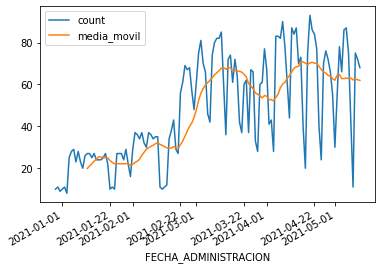

In [37]:
nuevoDF.plot(x='FECHA_ADMINISTRACION', kind="line").locator_params(axis="x", nbins=15)